In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import traceback
import logging
from kneed import KneeLocator, DataGenerator as dg
from kmeans import Kmeans
from hierarchial import Hierarchical

In [2]:
class DataDf:
    """Data class.
    The purpose of this class is to use it as a component of any clustering class, instead of 
    reloading data  as a seperate dataframe into the memory.
    
    Parameters
    ----------
    df : dataframe
        The dataframe contains the data with any type of attributes.
           
    """

    def __init__(self):
        """Attributes are defined here."""
        self.df = None
        
    def read_data(self, file_path):
        result ={}
        try:
            self.df = pd.read_csv(file_path)
            result['msg'] = 'File Read!'
            result['flag'] = True
        except Exception as e:
            result['msg'] =  f'{e.__class__} occurred!'
            result['flag'] = False
        return result
    

In [3]:
FILE_PATH = 'data/Iris_2.csv'
dataObj = DataDf()
rslt = dataObj.read_data(FILE_PATH)

## K-means

In [4]:
metrics_variables = dataObj.df.columns.to_list()[1:5]
print(metrics_variables)
cluster_by = dataObj.df.columns.to_list()[0]
data_scaling = 'z-scaling'
no_of_clusters = None
max_iterations = 50
metric = None

result = None
kmeansObj = None
if rslt['flag']:
    kmeansObj = Kmeans(dataObj,cluster_by,metrics_variables)
    result = kmeansObj.perform_clustering(data_scaling,k=no_of_clusters)
result

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaling_type: z-scaling | max_iteratoins: None | k: None
Scaling: 
 Z-scaling
In find_the_best_k() 



{'data': {'per_cluster_count': {0: 28, 1: 29, 2: 23, 3: 19, 4: 47},
  'cluster_statistics': {'total_cases': 150,
   'valid_cases': 146,
   'missing_cases': 4,
   'duplicate_cases': 0},
  'cluster_list': [0, 3, 1, 4, 2],
  'elbow_chart': {'x': [2, 3, 4, 5, 6, 7, 8, 9, 10],
   'y': [1.0721784405282995,
    0.8671812194485825,
    0.7828698191467496,
    0.7001433309525229,
    0.6597342186601428,
    0.6242012118872701,
    0.5867341842224998,
    0.5447920011895403,
    0.5063818211686413],
   'best_k': 5},
  'spider': [[0.9597272902954472,
    5.000000000000002,
    0.11184773310521812,
    0.26161741710436626],
   [5.0, 3.0532084950902014, 5.000000000000001, 4.999999999999999],
   [1.9002840427482628, 0.0, 2.9570424368654002, 2.752585957933186],
   [0.0, 2.56186824677588, 0.0, 0.0],
   [3.1837944362895723,
    1.8345779907002946,
    3.891323735507709,
    3.703917130953873]],
  'spider_columns': ['SepalLengthCm',
   'SepalWidthCm',
   'PetalLengthCm',
   'PetalWidthCm']},
 'success':

In [5]:
kl = KneeLocator(result['data']['elbow_chart']['x'], result['data']['elbow_chart']['y'], curve="convex", direction="decreasing")
kl.knee

5

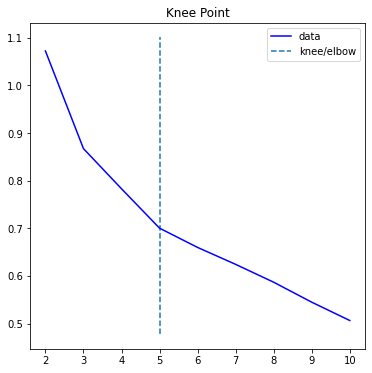

In [6]:
kl.plot_knee()

## Hierarchial Clustering

In [11]:
FILE_PATH = 'data/Iris_2.csv'
dataObj2 = DataDf()
rslt = dataObj2.read_data(FILE_PATH)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
None
Scaling: 
 Z-scaling
In find_the_best_k() 



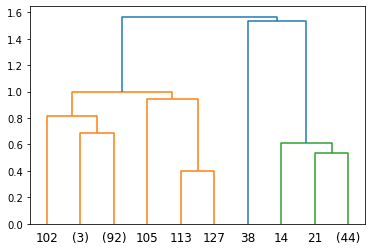

In [13]:
metrics_variables = dataObj2.df.columns.to_list()[1:5]
print(metrics_variables)
cluster_by = dataObj2.df.columns.to_list()[0]
data_scaling = 'z-scaling'
no_of_clusters = 3
max_iterations = 5
metric = None
categorical_colms = None
print(categorical_colms)

# ------------------------------------------------------------
# Hierarchical Obj initializatoin
hClusteringObj = Hierarchical(dataObj2,cluster_by, metrics_variables, categorical_colms)
result = hClusteringObj.perform_clustering(data_scaling)

In [10]:
dataObj.df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,4
147,148,6.5,3.0,5.2,2.0,Iris-virginica,4
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


In [ ]:
result